Manipulation des données avec python


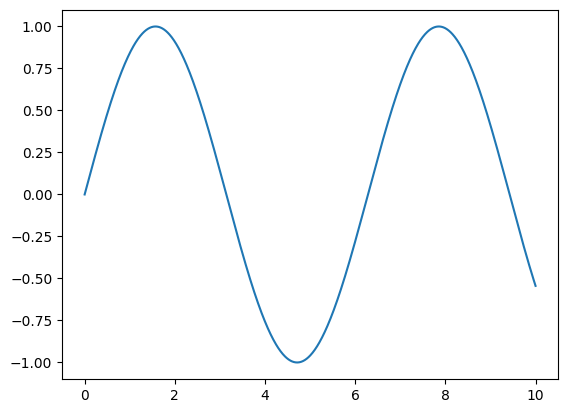

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x =np.linspace(0, 10, 1000)
plt.plot(x, np.sin(x))

In [ ]:
import emoji

print(emoji.emojize('Python est :thumbs_up:'))

Python est : thumbs_up:


MODULE PATHLIB : interagir avec les fichiers de systèmes

In [17]:
from pathlib import Path
Path.cwd().glob("*.*")

# Le chemin ou se trouve notre espace de travail 
# """current working directory""" 


--- MATRICE DE PRIX SIMULÉS (Prem. 5 Jours) ---
[[100.78301087  99.9081662  101.92140175 100.51574663  98.36587464]
 [100.63997327  99.95286451 101.34758512 100.9264268   96.93372711]
 [ 99.27634314  98.26585725 100.70792297 101.95239819  97.50129982]
 [ 99.45517863  98.90846986 101.30539052  99.99297898  98.12445034]
 [100.1402676   96.8150986  100.34930478  96.75704124  97.02323482]]

-------------CALCULS GENERAUX (Sur tous les rendements)------------------
Moyenne Globale: 0.001627
Écart-type Global: 0.010109

-------------ANALYSES PAR ACTION (axis=0)------------------
Moyenne par action (5 résultats): [0.00309276 0.00136655 0.00174048 0.00073623 0.00119673]
Volatilité par action (5 résultats): [0.01011618 0.00939231 0.00905561 0.01014264 0.01150339]

----------- ANALYSES DU RISQUE (Masques Booléens)------------
Masque créé (True si rendement < -0.02) : (252, 5)
Nombre total de jours de krach (rendement < -2%) : 26
Jours de risque par action : [5 3 1 8 9]
Action la plus risquée (In

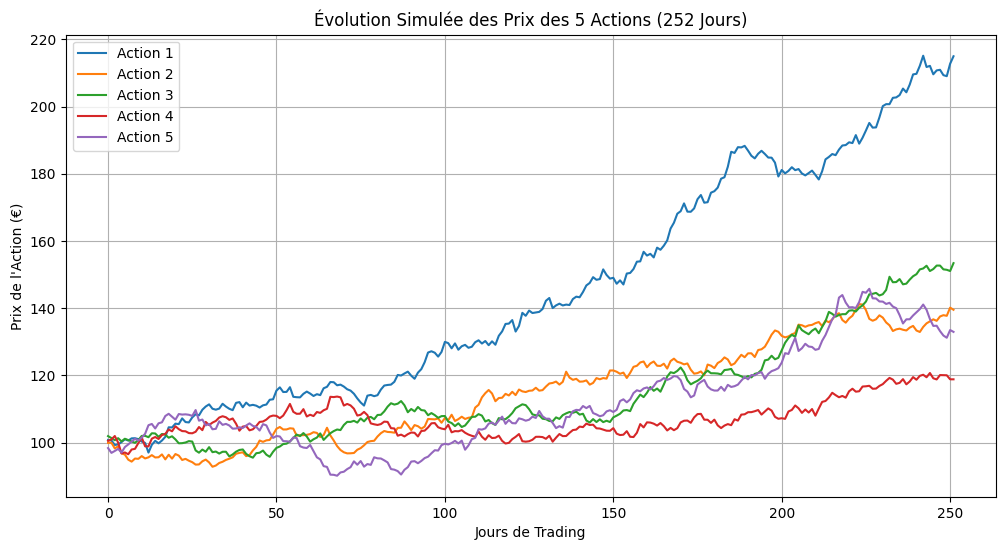

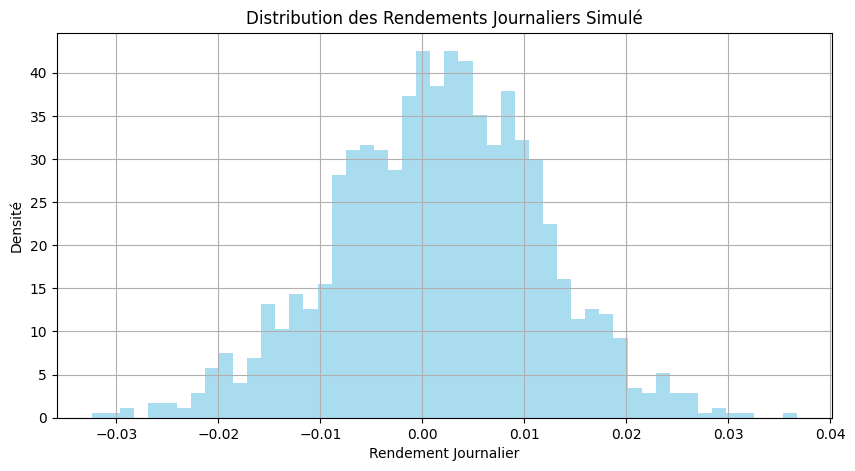

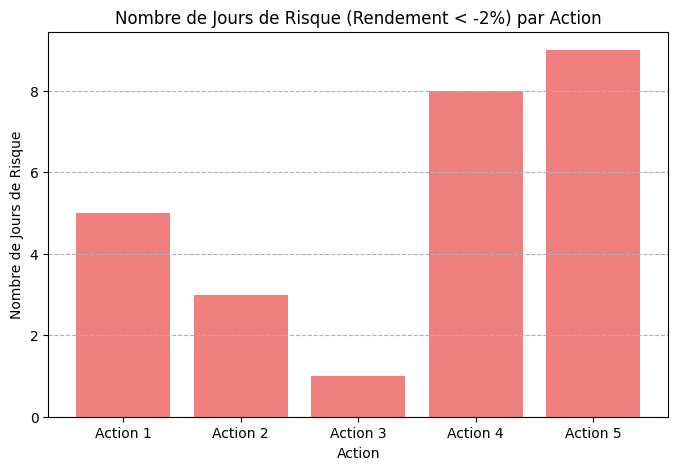

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Paramètres de la simulation
NB_JOURS = 252 
NB_ACTIONS = 5 
PRIX_INITIAL = 100 

# Création de la matrice des rendements
rendements = np.random.normal(loc=0.002, scale=0.01, size=(NB_JOURS, NB_ACTIONS))

# Transformation des rendements en multiplicateurs
multiplicateurs = 1 + rendements

# Calcul de l'évolution des prix au fil des jours (CORRIGÉ)
prix_simules = PRIX_INITIAL * np.cumprod(multiplicateurs, axis=0)

print("\n--- MATRICE DE PRIX SIMULÉS (Prem. 5 Jours) ---")
print(prix_simules[:5])

# -----------------------------------------------------------------
# CALCULS STATISTIQUES
# -----------------------------------------------------------------

print("\n-------------CALCULS GENERAUX (Sur tous les rendements)------------------")
moyenne = np.mean(rendements)
ecart_type = np.std(rendements)
print(f"Moyenne Globale: {moyenne:.6f}")
print(f"Écart-type Global: {ecart_type:.6f}")

print("\n-------------ANALYSES PAR ACTION (axis=0)------------------")
# Moyenne par colonne (performance de chaque action)
moy_par_action = np.mean(rendements, axis=0) 
# Écart-type par colonne (volatilité/risque de chaque action)
sd_par_action = np.std(rendements, axis=0) 
print(f"Moyenne par action (5 résultats): {moy_par_action}")
print(f"Volatilité par action (5 résultats): {sd_par_action}")

# -----------------------------------------------------------------
# ANALYSE DE RISQUE (Masques Booléens)
# -----------------------------------------------------------------

print("\n----------- ANALYSES DU RISQUE (Masques Booléens)------------")

# 1. Création du Masque Booléen (CORRIGÉ)
SEUIL_RISQUE = -0.02 # Perte de plus de 2%
masque_risque = rendements < SEUIL_RISQUE

# 2. Compter le nombre total de jours de risque (True est compté comme 1)
jours_risque_total = np.sum(masque_risque)
print(f"Masque créé (True si rendement < -0.02) : {masque_risque.shape}")
print(f"Nombre total de jours de krach (rendement < -2%) : {jours_risque_total}")

# 3. Identifier l'action la plus risquée (axis=0)
# On somme verticalement (axis=0) pour compter les "True" par colonne
jours_risque_par_action = np.sum(masque_risque, axis=0)
action_plus_risquee_index = np.argmax(jours_risque_par_action)

print(f"Jours de risque par action : {jours_risque_par_action}")
print(f"Action la plus risquée (Index): {action_plus_risquee_index}")


# --- 4. Visualisation des Résultats ---

print("\n--- GRAPHIQUES DE LA SIMULATION ---")

# 1. Évolution des prix des actions au fil du temps
plt.figure(figsize=(12, 6)) # Définit la taille de la figure
plt.plot(prix_simules) # Trace toutes les colonnes (actions)
plt.title('Évolution Simulée des Prix des 5 Actions (252 Jours)')
plt.xlabel('Jours de Trading')
plt.ylabel('Prix de l\'Action (€)')
plt.legend([f'Action {i+1}' for i in range(NB_ACTIONS)]) # Légendes pour chaque action
plt.grid(True) # Ajoute une grille
plt.show() # Affiche le graphique

# 2. Distribution des Rendements Journaliers (Histogramme)
# On aplatit la matrice des rendements pour avoir une seule série
plt.figure(figsize=(10, 5))
plt.hist(rendements.flatten(), bins=50, density=True, alpha=0.7, color='skyblue')
plt.title('Distribution des Rendements Journaliers Simulé')
plt.xlabel('Rendement Journalier')
plt.ylabel('Densité')
plt.grid(True)
plt.show()

# 3. Barres des Jours de Risque par Action
plt.figure(figsize=(8, 5))
actions_labels = [f'Action {i+1}' for i in range(NB_ACTIONS)]
plt.bar(actions_labels, jours_risque_par_action, color='lightcoral')
plt.title('Nombre de Jours de Risque (Rendement < -2%) par Action')
plt.xlabel('Action')
plt.ylabel('Nombre de Jours de Risque')
plt.grid(axis='y', linestyle='--')
plt.show()
